# Finite Volume Method for the Advection Equation 1D
\begin{equation}
\tag{1}
u_t(x,t) + \beta\cdot u_x(x,t) = 0, \quad (x,t)\in\Omega\times (0,T),
\end{equation}
where $\Omega=(a,b)\subset\mathbb R$ and  $\beta\in\mathbb R$.

Assuming $\beta>0$, we define the numerical flux:
$$
F_{i-1/2}^n = {\cal F}(u_i^n, u_{i+1}^{n+1}) = \beta u^n_{i-1}.
$$
That is, for each cell we approximate the flux by the solution at the left endpoint of the cell.

Then, the finite volume method reads:
$$
u_i^{n+1} = u_i^n -  \frac{\beta \Delta t}{\Delta x} \left( u_{i}^n -  u_{i-1}^n \right)
$$

It can be proven stability if $\Delta t$ is small enough. Specifically if the following CFL condition holds:
$$
0 < \frac{\beta\Delta t}{\Delta x} \le 1.
$$

In [23]:
"""
1D Transport Equation: Upwind Finite Volume method
    
Periodic boundary conditions are assumed:
- u_1^n = u_{N_x}^nfor all time step, n.
- a, b : [a,b] interval
- beta : advection velocity
- u0: array of initial values [u_1^0, u_2^0..., u_{N}^0]
- dx, dt:  x step and t stp
- nt: number of time iterations
    
The function returns a list of solution in each time step
"""
function advection1D_Upwind_FVM(a, b, beta, u0, dx, dt, nt; verbosity=0)
    nx = length(u0)
    u = zeros( (nt+1, nx) ) # Matriz nx por nt
    u[1,:] = u0
    r = beta*dt/dx
    for i=1:nt, j=1:nx
        u[i+1,j] = u[i,j] - r*(u[i,j]-u[i,j-1])
    end
end

advection1D_Upwind_FVM

In [16]:
# Dato inicial
a, b = 0, 1
beta = 1
nx=40
xi = LinRange(a, b, nx)
u0 = exp.( -50(xi.-0.3).^2 );

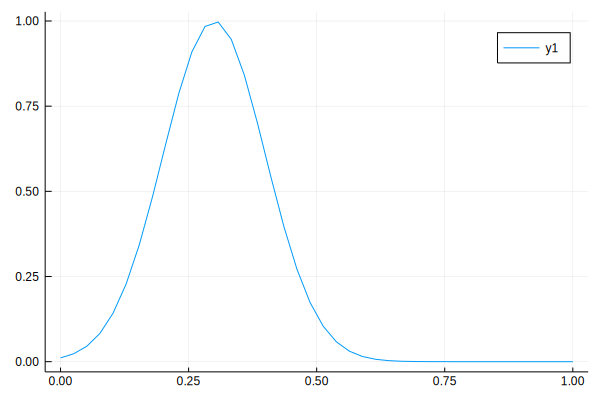

In [15]:
# Gráfica del dato inicial
# using Pkg
# Pkg.add("Plots")
using Plots
plot(xi, u0)

In [24]:
dx = xi[2]-xi[1]  # Talla de la malla en x
dt = 0.1          # Paso de tiempo
nt = 5            # Número de iteraciones de t

advection1D_Upwind_FVM(a, b, beta, u0, dx, dt, nt)

MethodError: MethodError: Cannot `convert` an object of type Array{Float64,1} to an object of type Float64
Closest candidates are:
  convert(::Type{T}, !Matched::T) where T<:Number at number.jl:6
  convert(::Type{T}, !Matched::Number) where T<:Number at number.jl:7
  convert(::Type{T}, !Matched::Base.TwicePrecision) where T<:Number at twiceprecision.jl:250
  ...

In [43]:
s = zeros((2, 3))
v = ones(3)
s[1,:] = v

2×3 Array{Float64,2}:
 1.0  1.0  1.0
 0.0  0.0  0.0